In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

from PIL import Image
import os 
import glob
import random

random.seed(42)


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the CSV file
df = pd.read_csv("data.csv")
# Set your base path where images are stored.
image_base_path = "BMI/Data/Images"  # update this to your actual image directory

# Load the CSV file
df = pd.read_csv("data.csv")

# Create a new column 'file_path' with the full path for each image.
df['file_path'] = df['name'].apply(lambda x: os.path.join(image_base_path, x))
df['log_bmi'] = np.log(df['bmi'])
# Keep only the rows where the file exists.
df = df[df['file_path'].apply(os.path.exists)]
df['sex'] = df['gender'].map({'Male': 0, 'Female': 1})
# Split into training and test sets based on the 'is_training' flag
df_train_full = df[df['is_training'] == 1]
df_test = df[df['is_training'] == 0]

# Further split the full training set into train and validation sets (e.g., 80/20 split)
df_train, df_valid = train_test_split(df_train_full, test_size=0.12, random_state=42)


In [25]:
from scipy.stats import boxcox

# Assume df is your DataFrame and it contains a 'bmi' column
# Check if BMI values are strictly positive. If not, shift them by adding a constant.
if (df['bmi'] <= 0).any():
    offset = 1 - df['bmi'].min()  # ensure minimum value becomes 1
    df['bmi_adjusted'] = df['bmi'] + offset
else:
    df['bmi_adjusted'] = df['bmi']

# Apply the Box-Cox transformation to the adjusted BMI column.
df['bmi_boxcox'], fitted_lambda = boxcox(df['bmi_adjusted'])

print("Fitted lambda for Box-Cox transformation:", fitted_lambda)

Fitted lambda for Box-Cox transformation: -0.6408846623941737


C:\Users\chien\AppData\Local\Temp\ipykernel_23024\1610785391.py:46: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


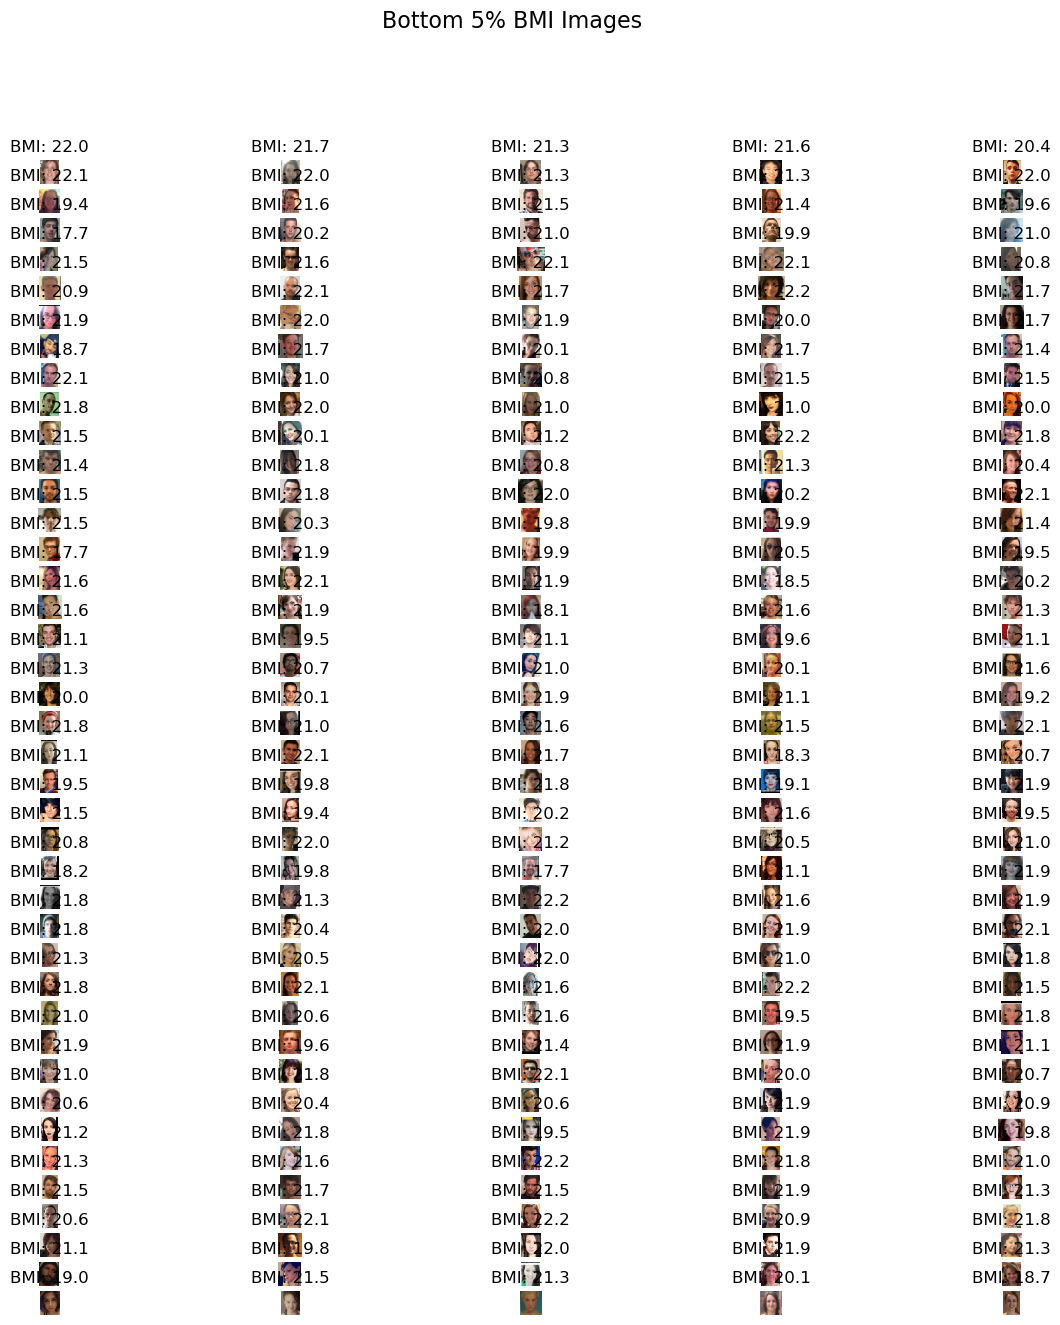

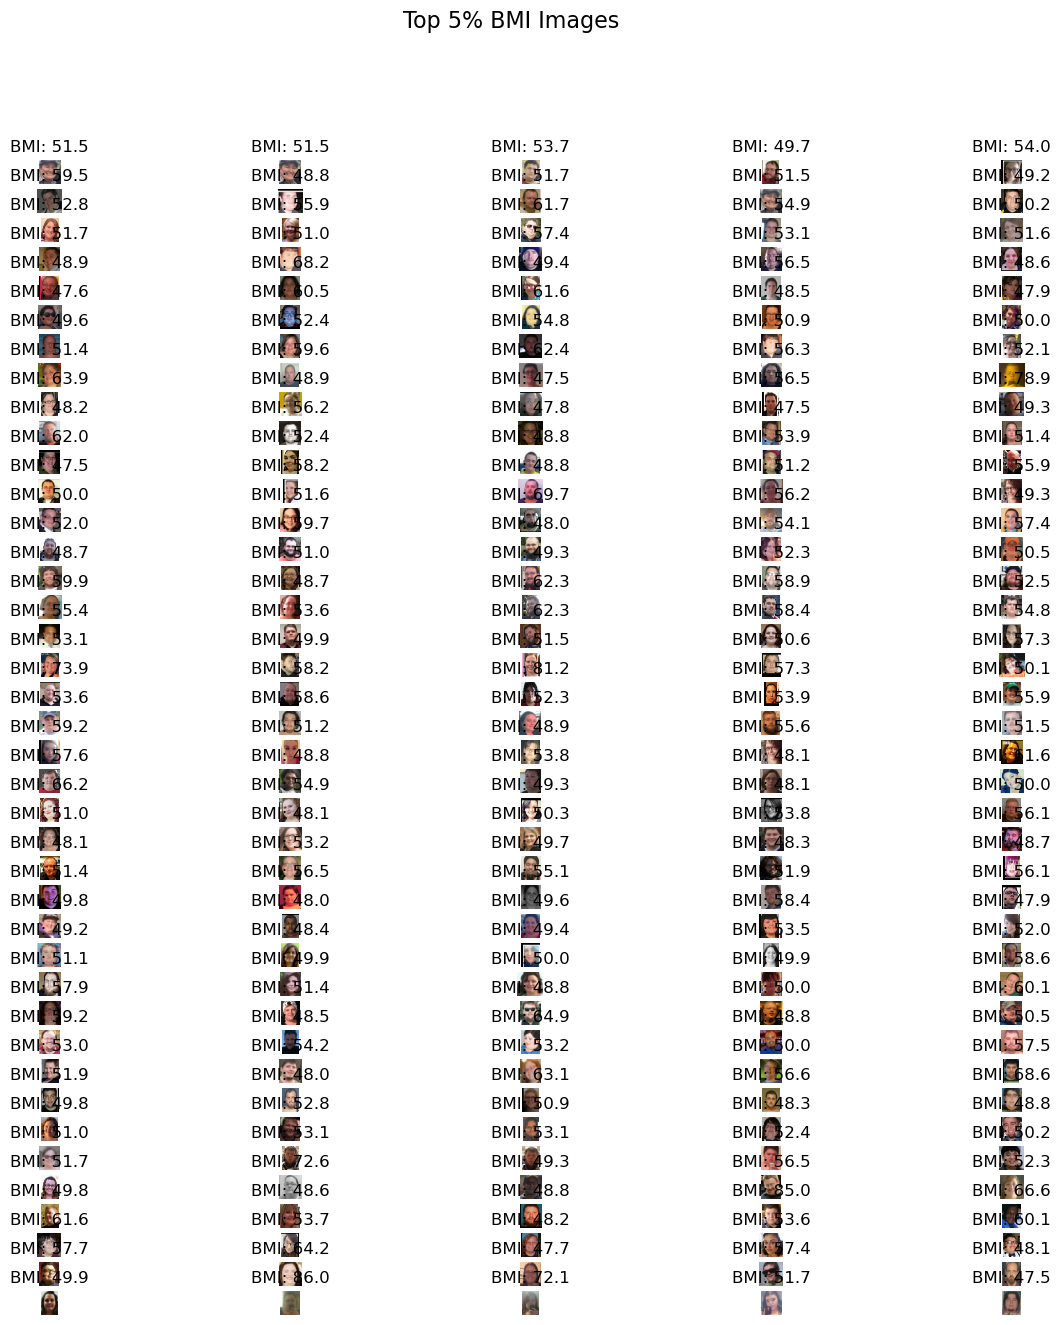

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Assume df is your DataFrame containing at least 'name' and 'bmi' columns.
# Also, set your base path where images are stored:
image_base_path = "BMI/Data/Images"   # update this path

# Calculate the 5th and 95th percentiles
bottom_threshold = df['bmi'].quantile(0.05)
top_threshold = df['bmi'].quantile(0.95)

# Filter the DataFrame for bottom 5% and top 5%
bottom_df = df[df['bmi'] <= bottom_threshold]
top_df = df[df['bmi'] >= top_threshold]

def display_images(df_subset, title, ncols=5, figsize=(15, 15)):
    n = len(df_subset)
    ncols = min(n, ncols)
    nrows = (n + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    fig.suptitle(title, fontsize=16)
    
    # Flatten axes array for easy iteration
    if n > 1:
        axes = axes.flatten()
    else:
        axes = [axes]
    
    for ax, (_, row) in zip(axes, df_subset.iterrows()):
        img_path = os.path.join(image_base_path, row['name'])
        try:
            image = Image.open(img_path).convert("RGB")
            ax.imshow(image)
            ax.axis("off")
            ax.set_title(f"BMI: {row['bmi']:.1f}")
        except Exception as e:
            ax.text(0.5, 0.5, f"Error:\n{e}", ha="center", va="center")
            ax.axis("off")
    
    # Remove extra subplots if there are any
    for ax in axes[len(df_subset):]:
        ax.remove()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Display images for bottom 5% BMI values
display_images(bottom_df, "Bottom 5% BMI Images")

# Display images for top 5% BMI values
display_images(top_df, "Top 5% BMI Images")


In [38]:
df.sort_values(by='bmi')

,Unnamed: 0,bmi,gender,is_training,name,file_path,log_bmi,sex,bmi_adjusted,bmi_boxcox
2655,2655,17.716216,Female,1,img_2655.bmp,BMI/Data/Images\img_2655.bmp,2.874480,1,17.716216,1.313081
287,287,17.718967,Female,1,img_287.bmp,BMI/Data/Images\img_287.bmp,2.874636,1,17.718967,1.313105
1491,1491,17.718967,Female,1,img_1491.bmp,BMI/Data/Images\img_1491.bmp,2.874636,1,17.718967,1.313105
1825,1825,18.129339,Male,1,img_1825.bmp,BMI/Data/Images\img_1825.bmp,2.897532,0,18.129339,1.316707
2631,2631,18.243945,Female,1,img_2631.bmp,BMI/Data/Images\img_2631.bmp,2.903833,1,18.243945,1.317689
...,...,...,...,...,...,...,...,...,...,...
2132,2132,73.875023,Male,1,img_2132.bmp,BMI/Data/Images\img_2132.bmp,4.302375,0,73.875023,1.461322
1124,1124,78.908163,Male,1,img_1124.bmp,BMI/Data/Images\img_1124.bmp,4.368285,0,78.908163,1.465417
2156,2156,81.211930,Male,1,img_2156.bmp,BMI/Data/Images\img_2156.bmp,4.397062,0,81.211930,1.467152
4008,4008,84.984889,Male,0,img_4008.bmp,BMI/Data/Images\img_4008.bmp,4.442473,0,84.984889,1.469825


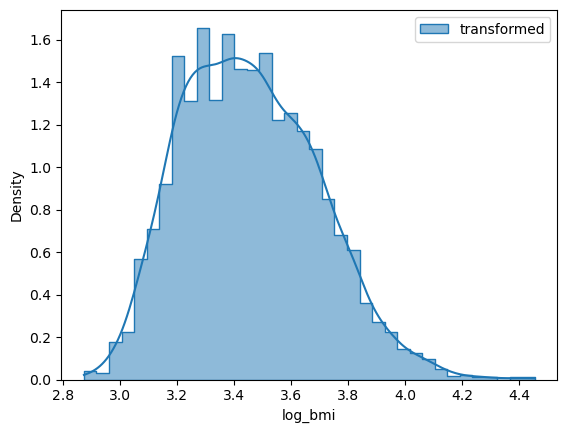

In [22]:
sns.histplot(df['log_bmi'], kde=True, stat="density", element="step", label='transformed')

plt.legend()
plt.show()

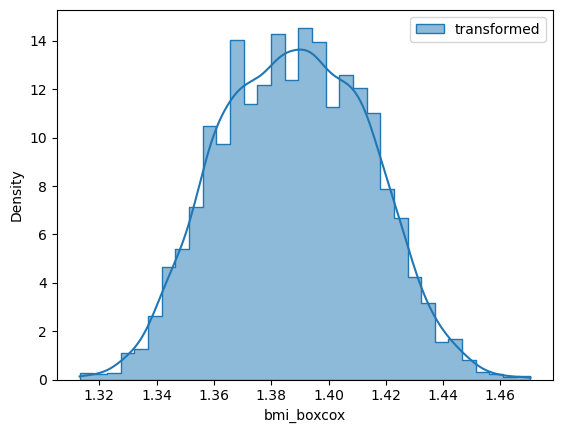

In [27]:
sns.histplot(df['bmi_boxcox'], kde=True, stat="density", element="step", label='transformed')

plt.legend()
plt.show()

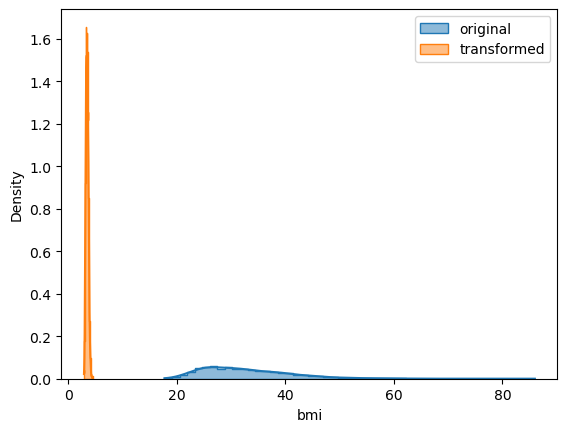

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histogram and KDE for column1
sns.histplot(df['bmi'], kde=True, stat="density", element="step", label='original')
# Plot histogram and KDE for column2 on the same axes
sns.histplot(df['log_bmi'], kde=True, stat="density", element="step", label='transformed')

plt.legend()
plt.show()
